# Model Evaluation & Selection

The objective function that's optimized during the training phase may be a different, what's called a surrogate metric, that's easier to use in practice for optimization purposes than what's used for the evaluation metric.

Example: A commercial search enfine might use a ranking algorithm that is trained to recommend relevant web pages that best match a query. In other words, trying to predict a relevant label for a page. And that might be the objective in the training phase. But there are many evaluation methods in the evaluation phase that could be applied to measure aspects of that search enfine's performance, such as:
- unique users
- user search session
- etc...

## Evaluation
Accuracy is widely used, but depending on the applications, other measures are possible:
- User satisfaction (web search)
- Amount of revenue (e-commerce)
- Increase in patient survival rates (medical)

In the end, we will be selecting models that optimize these metrics, and not just accuracy.

<img src="resources/model_evaluation_1.png" width = "400">

## Extra notes:
- **Accuracy**: the fraction of samples that were classified correctly.

## Evaluation for Classification

### Preamble

In [27]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

import warnings

warnings.filterwarnings("ignore")

In [28]:
# Loading data
dataset = load_digits()
X, y = dataset.data, dataset.target

# np.bincount -> to count the ocurrences of each label
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [29]:
# Let's create a dataset with imbalanced data
# For that purpose, instead of having 10 labels (0 to 9), we'll just have 2: "1" and "not 1"

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

# Let's have a look at our new labels
print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [30]:
# Let's count the ocurrence per label in our new dataset
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

In [32]:
# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

It looks quite good, but let's compare this to a Dummy Classifier.

### Dummy Classifier

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

- They ignore the data and stick to the rules
- They shouldn't be used as solution for real problems. Just as baseline
- **Strategy parameter**:
    - most_frequent: predicts the most ferquent label in the training set
    - stratified: random predictions based on training set class distribution
    - uniform: generates predictions uniformly at random
    - constant: always predicts a constant label provided by the user -> This is specially useful when the positive class is the minority one as well

In [33]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [35]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

As we can see, the Dummy Classifier predicting everything as 0 has 90% score (just a bit lower than the SVM one).

When our models aren't much better than the dummy classifier, this could be a sign of:
- Ineffective, erroneous or missing features
- Poor choice of kernel or hyperparameter
- Large class imbalance

## Confusion matrices

### Binary (two-class) confusion matrix

#### Using Dummy Classifier

In [36]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [37]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[363  44]
 [ 36   7]]


#### Using Machine Learning Models

In [38]:
svm = SVC(kernel='linear', C=1, random_state = 0).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2, random_state = 0).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


## Dummy regressors

These are the counterpart of the Dummy Classifiers for regression problems.

**Strategy parameter**:
- mean: predicts the mean of the training targets
- median: predicts the median of the training targets
- quantile: predicts a user-provided quantile of the training targets
- constant: predicts a constant user-provided value

# Confusion Matrices & Basic Evaluation Metrics

<img src="resources/confusion_matrix.png" width = "400">

------

## Accuracy
<img src="resources/accuracy.png" width = "200">

------

## Classification error
- Also, calculated as 1 - accuracy

<img src="resources/classification_error.png" width = "200">

------

## Recall
What fraction of all positive instances does the classifier correctly identify as positive?

- True Positive Rate (TPR)
- Sensitivity
- Probability of detection

<img src="resources/recall.png" width = "200">

------

## Precision
What fraction of positive predictions are correct?

- Specificity

<img src="resources/precision.png" width = "200">

------

## False Positive Rate (FPR)
What fraction of all nefative instances does the classifier incorrectly identify as positive?

<img src="resources/false_positive_rate.png" width = "200">

------

## Precision-recall tradeoff

### Recall-oriented machine learning tasks
- Medical and legal applications where the consequences of false negatives can be high.
- Often paired with a human expert to filter out false positives

### Precision-oriented machine learning tasks
- Many customer-facing tasks as users remember failures and the consequences of false positives can be high.
- Search engine ranking, query suggestions, document classification, ...

<img src="resources/f1_score.png" width = "600">


## Evaluation metrics for binary classification

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [42]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [43]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.89      0.90       407
           1       0.14      0.16      0.15        43

    accuracy                           0.82       450
   macro avg       0.52      0.53      0.52       450
weighted avg       0.84      0.82      0.83       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

# Classifier Decision Functions

When given a set of test points, the decision function method provides for each one a classifier score value that indicates how confidently classifier predicts the positive class (large-magnitude values) or the negative class (large-magnitude negative values).

- Typical rule: choose most likely class (threshold > 0.5)
- Adjusting threshold affects predictions of classifier
- Higher threshold results in a more conservative classifier (for example, threshold > 0.7)
- Not all models provide realistic probability estimates

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
# decision function method returns the value before passing though the function that converts it into a probability
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -29.82878885428698),
 (0, -19.38292791420195),
 (0, -29.198327257201743),
 (0, -21.746174115798574),
 (0, -22.64239804996128),
 (0, -11.80601316319518),
 (1, 6.496016572624416),
 (0, -23.35456282787909),
 (0, -27.543436971220387),
 (0, -26.88821968799928),
 (0, -31.86269074250119),
 (0, -22.486131395524808),
 (0, -25.31799892081813),
 (0, -13.384564231087923),
 (0, -13.565608315834),
 (0, -13.308404562543435),
 (1, 12.180778621399947),
 (0, -34.36249371177895),
 (0, -13.231503124195685),
 (0, -29.593934459364586)]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# predict_proba returns the probability of a given observation to have that label
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 1.1105077627365785e-13),
 (0, 3.8203342505101854e-09),
 (0, 2.0860638224426631e-13),
 (0, 3.5954775289931444e-10),
 (0, 1.4673424093995484e-10),
 (0, 7.459511542756899e-06),
 (1, 0.9984928349973813),
 (0, 7.198503772008908e-11),
 (0, 1.0915341073965711e-12),
 (0, 2.1018153589129763e-12),
 (0, 1.4528113762683703e-14),
 (0, 1.715525648508253e-10),
 (0, 1.0104917586429055e-11),
 (0, 1.5387105925755556e-06),
 (0, 1.2838982508367566e-06),
 (0, 1.6604760443198858e-06),
 (1, 0.9999948719431359),
 (0, 1.1927751884236894e-15),
 (0, 1.793207006513804e-06),
 (0, 1.404486491577931e-13)]

# Precision-Recall Curves

- The ideal point is the top right corner:
    - Precision = 1
    - Recall = 1
- The "steepness" of the curve shows us the trade-off between precision and recall

<img src="resources/precision_recall_curve.png" width = "400">

- The ideal point in this case is the top left corner:
    - False Positive Rate = 0
    - True Positive Rate = 1
- The "steepness" of the curve shows us the trade-off between true positives and false positives
- The dotted line is the result from a classifier that randomly guesses the label. This means, models whose lines are below the dotted line, are worse than randomly guessing.
- We can also see how good a model performs by measuring the Area Under the Curve (AUC)

<img src="resources/roc_curve.png" width = "400">

## Precision-recall curve

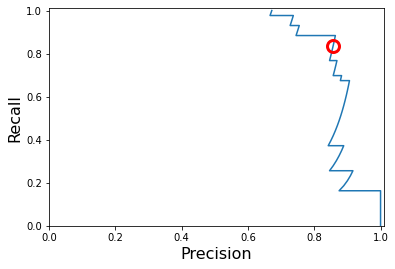

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])

plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

plt.show()

## ROC Curve

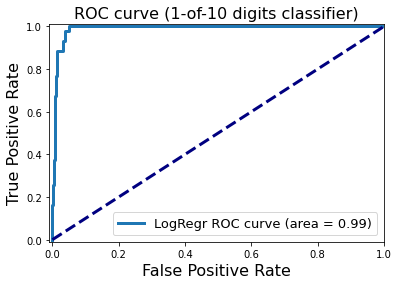

In [47]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


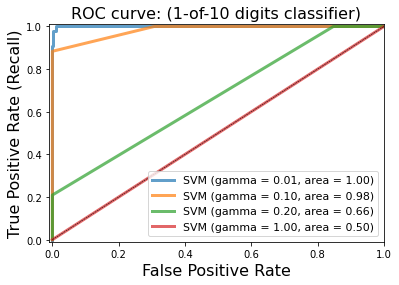

In [48]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

# Train an SVM model with different gamma values
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    # Score
    y_score_svm = svm.decision_function(X_test)
    # ROC Curve
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    # Area under the curve -> another way to measure the model
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)

plt.show()

# Multi-class evaluation

Overall evaluation metrics are averages across classes

## Micro vs Macro Average

### Macro Average
Each **class** has equal weight
1. Compute metric within each class
2. Average resulting metrics across classes

<img src="resources/micro_average.png" width = "600">

### Micro Average
Each **instance** has equal weight
- Largest classes have most influence

1. Aggregate outcomes across all classes
2. Compute metric with aggregate outcomes

<img src="resources/macro_average.png" width = "600">

## Multi-class confusion matrix

In [66]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

#### Using SVM Linear
svm1 = SVC(kernel = 'linear', random_state = 0).fit(X_train_mc, y_train_mc)
# Predictions
svm1_predicted_mc = svm1.predict(X_test_mc)
# Confusion matrix
confusion_mc1 = confusion_matrix(y_test_mc, svm1_predicted_mc)
df_cm1 = pd.DataFrame(confusion_mc1)
# Matplotlib figure
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm1, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm1_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


#### Using SVM Radial Basis Function
svm2 = SVC(kernel = 'rbf', random_state = 0).fit(X_train_mc, y_train_mc)
# Predictions
svm2_predicted_mc = svm2.predict(X_test_mc)
# Confusion matrix
confusion_mc2 = confusion_matrix(y_test_mc, svm2_predicted_mc)
df_cm2 = pd.DataFrame(confusion_mc2)
# Matplotlib figure
plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm2, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm2_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [50]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



## Micro- vs macro-averaged metrics

In [64]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm1_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm1_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.97 (treat instances equally)
Macro-averaged precision = 0.97 (treat classes equally)


In [63]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm2_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm2_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.91 (treat instances equally)
Macro-averaged f1 = 0.91 (treat classes equally)
